In [1]:
from siphon.catalog import TDSCatalog
from datetime import datetime
from xarray.backends import NetCDF4DataStore
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.plots import ctables
from tqdm import trange
import os
import numpy as np

In [2]:
def retrive_dataset(measure_type, start_date, interval):
    base_dir = os.getcwd()
    record_list = []

    for i in range(interval*8):
        filename = base_dir + "/dataset/{}-2021-03-{}-{}.csv".format(measure_type, start_date, i)
        record_list.append(np.loadtxt(filename, delimiter=','))
    
    dataset_raw = np.stack(record_list, axis = 0)
    vmin = np.amin(dataset_raw)
    vmax = np.amax(dataset_raw)
    return dataset_raw, vmin, vmax

In [3]:
start_date = 10
interval = 12
loc = [43, 35, 260, 249]
measure_type = 'Relative_humidity_entire_atmosphere_single_layer'

dataset1, vmin, vmax = retrive_dataset(measure_type, start_date, interval)
dataset1.shape

(96, 33, 45)

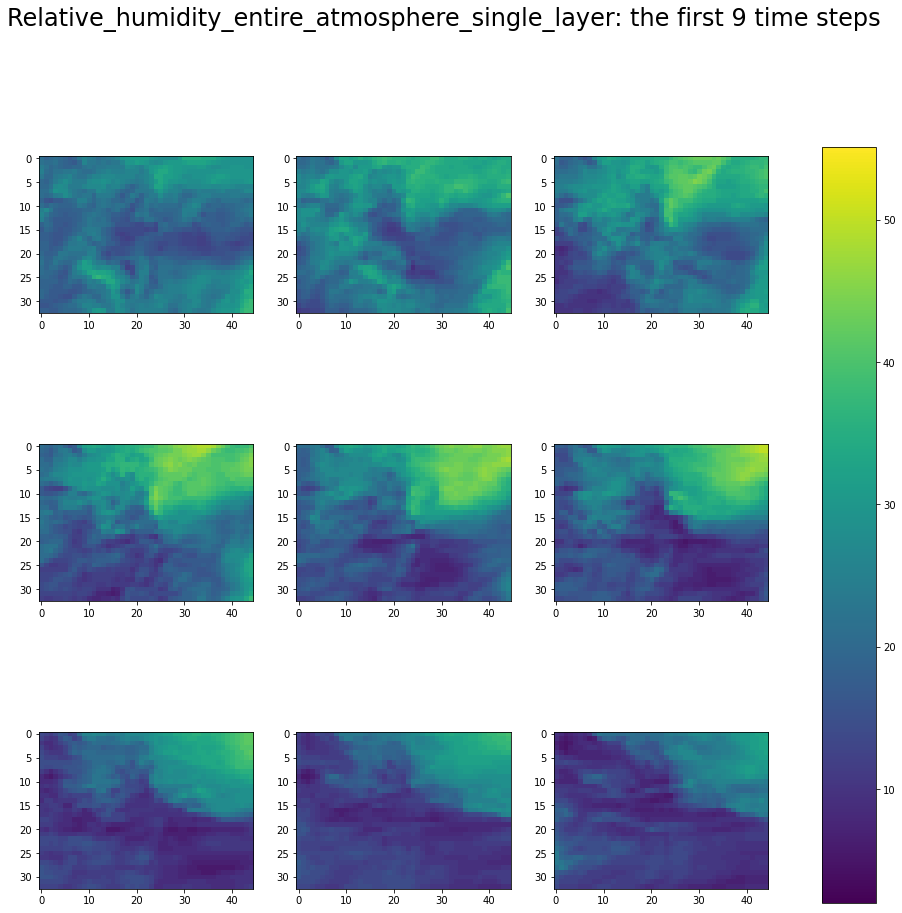

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15, 15))
i = 0
for ax in axes.flat:
    im = ax.imshow(dataset1[i, :, :], vmin=vmin, vmax=vmax)
    i+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

fig.suptitle("{}: the first 9 time steps".format(measure_type), fontsize = 24)

plt.show()

In [5]:
#try to detect edge

def detect_edge(matrix, threshold):
    m, n = matrix.shape
    result = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if i + 1 < m and abs(matrix[i, j] - matrix[i+1, j]) >= threshold:
                result[i, j] = 1.0
            elif i - 1 >= 0 and abs(matrix[i, j] - matrix[i-1, j]) >= threshold:
                result[i, j] = 1.0
            elif j + 1 < n and abs(matrix[i, j] - matrix[i, j+1]) >= threshold:
                result[i, j] = 1.0
            elif j - 1 >= 0 and abs(matrix[i, j] - matrix[i, j-1]) >= threshold:
                result[i, j] = 1.0
    return result

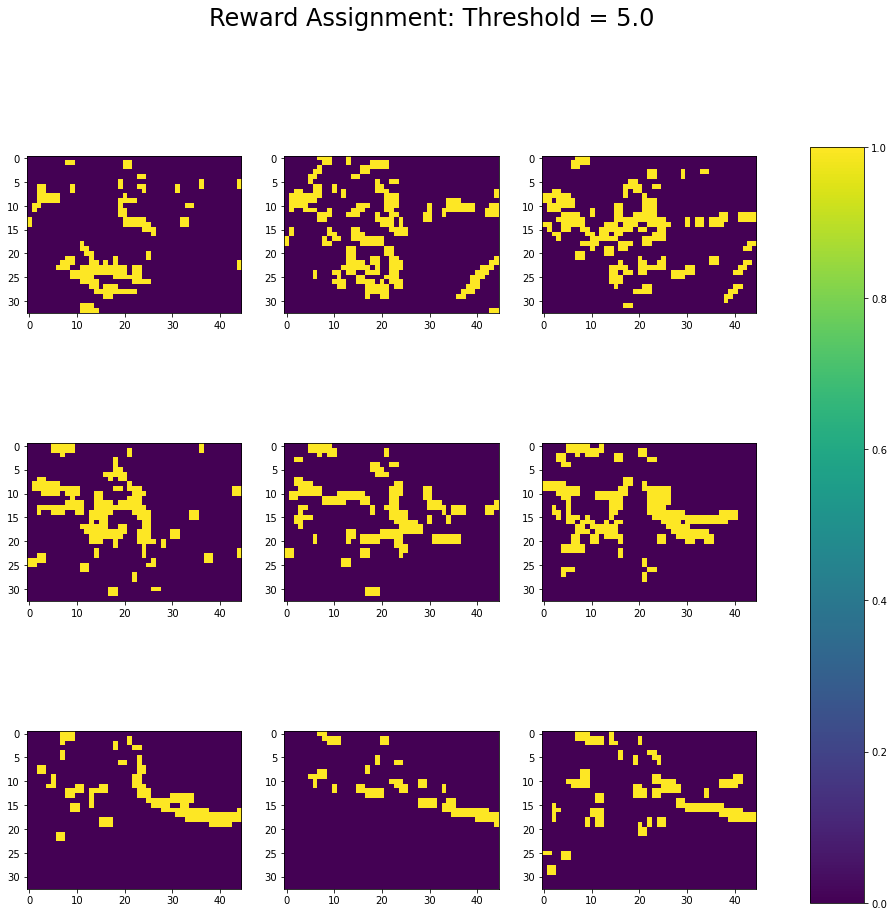

In [6]:
threshold = 5.0

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15, 15))
i = 0
for ax in axes.flat:
    im = ax.imshow(detect_edge(dataset1[i, :, :], threshold), vmin=0, vmax=1)
    i+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

fig.suptitle("Reward Assignment: Threshold = {}".format(threshold), fontsize = 24)
plt.show()

In [7]:
start_date = 10
interval = 12
loc = [43, 35, 260, 249]
measure_type = 'Temperature_surface'

dataset2, vmin, vmax = retrive_dataset(measure_type, start_date, interval)
dataset2.shape

(96, 33, 45)

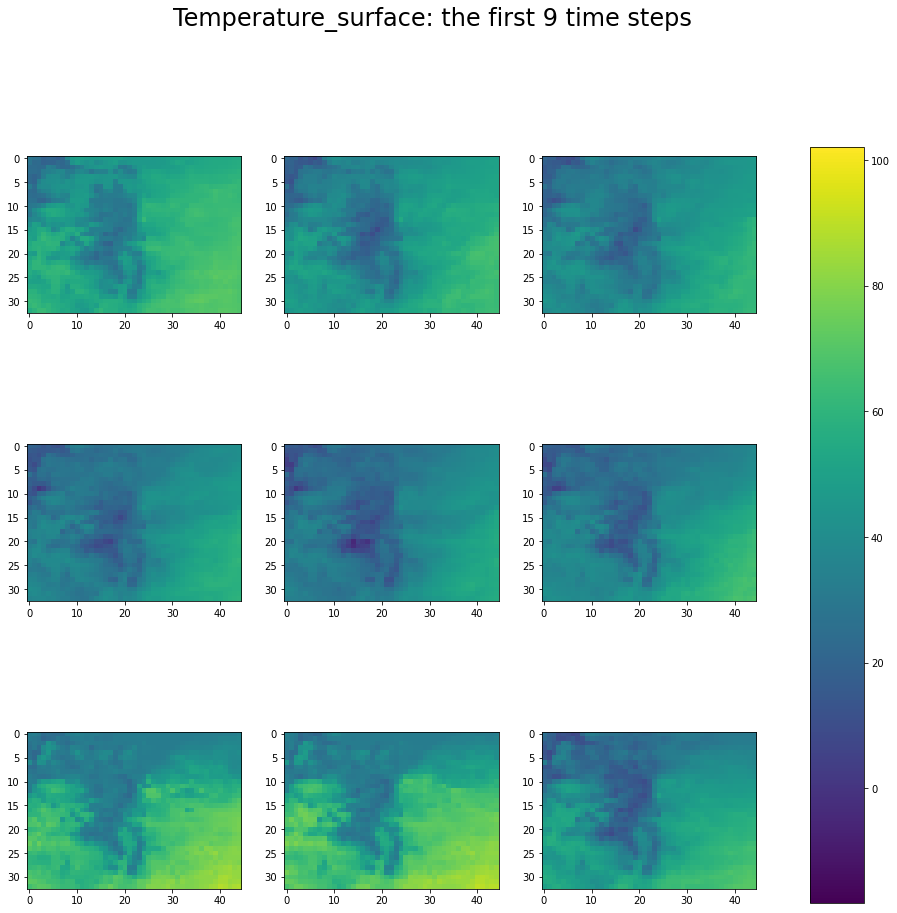

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15, 15))
i = 0
for ax in axes.flat:
    im = ax.imshow(dataset2[i, :, :], vmin=vmin, vmax=vmax)
    i+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

fig.suptitle("{}: the first 9 time steps".format(measure_type), fontsize = 24)

plt.show()

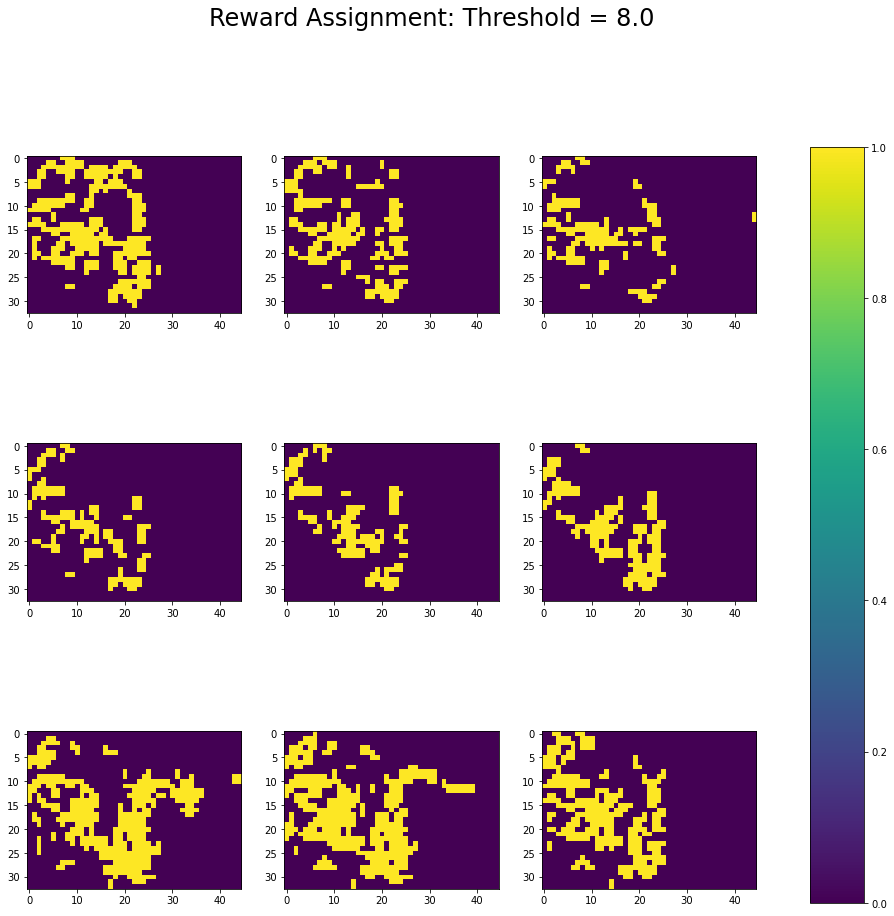

In [9]:
threshold = 8.0

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15, 15))
i = 0
for ax in axes.flat:
    im = ax.imshow(detect_edge(dataset2[i, :, :], threshold), vmin=0, vmax=1)
    i+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

fig.suptitle("Reward Assignment: Threshold = {}".format(threshold), fontsize = 24)
plt.show()